# Imports

In [1]:
from pathlib import Path
from src.data.paths import project_dir
from src.data.analysis import Circle, get_mean_std, get_timestamp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from typing import List
def read_df(path : Path , det_names : List[str]) -> pd.DataFrame:
    df = pd.DataFrame()
    df["det_id"] = det_names
    df.det_id = df.det_id.astype('uint8')
    df["raw_data"] = df.det_id.apply(lambda id: np.load(path / f"{id}" / "raw.npy"))
    df["timestamp"] = df.det_id.apply(lambda id: get_timestamp(path / f"{id}" / "metadata.txt"))
    df["det_circle"] = df.det_id.apply(lambda x: Circle.from_json(path / f"{x}lv" / "det-circle.json"))
    df["raw_mean_center"] = df.apply(lambda tmpdf: get_mean_std(tmpdf.raw_data, tmpdf.det_circle)[0], axis=1)
    df["raw_std_center"] = df.apply(lambda tmpdf: get_mean_std(tmpdf.raw_data, tmpdf.det_circle)[1], axis=1)
    return df

# Data reading

In [3]:
pre_irr_bg = project_dir / "data" / "interim" / "foils" / "2022_11_23_background"
pre_irr_bg_ids = sorted((entry.name for entry in pre_irr_bg.iterdir() if entry.name.isdigit()), key=lambda s: int(s))
pre_irr_bg, pre_irr_bg_ids;

In [4]:
data_co60 = project_dir / "data" / "interim" / "foils" / "2022_11_23_Co60"
data_co60_ids = sorted((entry.name for entry in data_co60.iterdir() if entry.name.isdigit()), key=lambda s: int(s))
data_co60, data_co60_ids;

In [5]:
post_irr_bg = project_dir / "data" / "interim" / "foils" / "2022_11_24_background"
post_irr_bg_ids = sorted((entry.name for entry in post_irr_bg.iterdir() if entry.name.isdigit()), key=lambda s: int(s))
post_irr_bg, post_irr_bg_ids;

In [6]:
df_pre_bg = read_df(pre_irr_bg, pre_irr_bg_ids)
df_pre_bg["label"] = "pre_irr_bg"
df_pre_bg.head()

det_id                                           raw_data  \
0       1  [[1020.0, 1062.0, 1058.0, 1071.0, 1066.0, 1073...   
1       2  [[1026.0, 1061.0, 1061.0, 1073.0, 1061.0, 1065...   
2       3  [[1024.0, 1067.0, 1067.0, 1067.0, 1057.0, 1069...   
3       4  [[1025.0, 1065.0, 1062.0, 1064.0, 1068.0, 1074...   
4       5  [[1017.0, 1057.0, 1065.0, 1068.0, 1073.0, 1068...   

                  timestamp                                      det_circle  \
0 2022-11-23 11:08:33+01:00   Circle(x=512.5, y=487.5, r=485.3999938964844)   
1 2022-11-23 11:10:45+01:00   Circle(x=486.5, y=478.5, r=487.1000061035156)   
2 2022-11-23 11:12:14+01:00               Circle(x=487.5, y=466.5, r=489.0)   
3 2022-11-23 11:13:33+01:00               Circle(x=487.5, y=496.5, r=488.0)   
4 2022-11-23 11:14:53+01:00  Circle(x=497.5, y=457.5, r=489.79998779296875)   

   raw_mean_center  raw_std_center       label  
0      1038.505005       12.582836  pre_irr_bg  
1      1039.671265       12.507147  pre_irr_bg  
2      1040.051636       12.474659  pre_irr_bg  
3      1040.449829       12.496416  pre_irr_bg  
4      1040.264282       12.218828  pre_irr_bg

In [7]:
df_Co60 = read_df(data_co60, data_co60_ids)
df_Co60["label"] = "Co60"
df_Co60.head()

det_id                                           raw_data  \
0       1  [[1037.0, 1071.0, 1071.0, 1080.0, 1078.0, 1069...   
1       2  [[1032.0, 1073.0, 1084.0, 1082.0, 1082.0, 1077...   
2       3  [[1023.0, 1079.0, 1071.0, 1065.0, 1082.0, 1071...   
3       4  [[1029.0, 1067.0, 1066.0, 1069.0, 1072.0, 1071...   
4       5  [[1020.0, 1070.0, 1064.0, 1073.0, 1079.0, 1080...   

                  timestamp                                      det_circle  \
0 2022-11-23 16:34:28+01:00               Circle(x=497.5, y=481.5, r=484.0)   
1 2022-11-23 16:33:01+01:00   Circle(x=477.5, y=481.5, r=484.8999938964844)   
2 2022-11-23 16:31:33+01:00   Circle(x=484.5, y=489.5, r=484.6000061035156)   
3 2022-11-23 16:30:18+01:00  Circle(x=489.5, y=501.5, r=488.70001220703125)   
4 2022-11-23 16:29:01+01:00   Circle(x=486.5, y=508.5, r=485.3999938964844)   

   raw_mean_center  raw_std_center label  
0      1214.841187       42.278210  Co60  
1      1223.067017       41.457825  Co60  
2      1220.954590       41.784103  Co60  
3      1209.537476       40.260750  Co60  
4      1229.223877       44.386940  Co60

In [8]:
df_post_bg = read_df(post_irr_bg, post_irr_bg_ids)
df_post_bg["label"] = "post_irr_bg"
df_post_bg.head()

det_id                                           raw_data  \
0       1  [[1020.0, 1068.0, 1065.0, 1068.0, 1071.0, 1074...   
1       2  [[1024.0, 1062.0, 1069.0, 1068.0, 1064.0, 1070...   
2       3  [[1026.0, 1067.0, 1064.0, 1069.0, 1072.0, 1062...   
3       4  [[1020.0, 1072.0, 1065.0, 1070.0, 1068.0, 1074...   
4       5  [[1026.0, 1061.0, 1062.0, 1074.0, 1068.0, 1065...   

                  timestamp                                      det_circle  \
0 2022-11-24 11:48:12+01:00  Circle(x=515.5, y=495.5, r=486.79998779296875)   
1 2022-11-24 11:50:16+01:00  Circle(x=494.5, y=473.5, r=486.20001220703125)   
2 2022-11-24 11:51:32+01:00   Circle(x=494.5, y=487.5, r=485.3999938964844)   
3 2022-11-24 11:52:49+01:00               Circle(x=490.5, y=497.5, r=489.5)   
4 2022-11-24 11:54:06+01:00   Circle(x=485.5, y=488.5, r=486.1000061035156)   

   raw_mean_center  raw_std_center        label  
0      1038.927246       11.643701  post_irr_bg  
1      1039.829468       12.458657  post_irr_bg  
2      1040.009399       12.294284  post_irr_bg  
3      1040.453247       12.480117  post_irr_bg  
4      1040.648560       12.576518  post_irr_bg

In [9]:
df = pd.concat([df_pre_bg, df_Co60, df_post_bg], ignore_index=True)
df.head()

det_id                                           raw_data  \
0       1  [[1020.0, 1062.0, 1058.0, 1071.0, 1066.0, 1073...   
1       2  [[1026.0, 1061.0, 1061.0, 1073.0, 1061.0, 1065...   
2       3  [[1024.0, 1067.0, 1067.0, 1067.0, 1057.0, 1069...   
3       4  [[1025.0, 1065.0, 1062.0, 1064.0, 1068.0, 1074...   
4       5  [[1017.0, 1057.0, 1065.0, 1068.0, 1073.0, 1068...   

                  timestamp                                      det_circle  \
0 2022-11-23 11:08:33+01:00   Circle(x=512.5, y=487.5, r=485.3999938964844)   
1 2022-11-23 11:10:45+01:00   Circle(x=486.5, y=478.5, r=487.1000061035156)   
2 2022-11-23 11:12:14+01:00               Circle(x=487.5, y=466.5, r=489.0)   
3 2022-11-23 11:13:33+01:00               Circle(x=487.5, y=496.5, r=488.0)   
4 2022-11-23 11:14:53+01:00  Circle(x=497.5, y=457.5, r=489.79998779296875)   

   raw_mean_center  raw_std_center       label  
0      1038.505005       12.582836  pre_irr_bg  
1      1039.671265       12.507147  pre_irr_bg  
2      1040.051636       12.474659  pre_irr_bg  
3      1040.449829       12.496416  pre_irr_bg  
4      1040.264282       12.218828  pre_irr_bg

# Data inspection

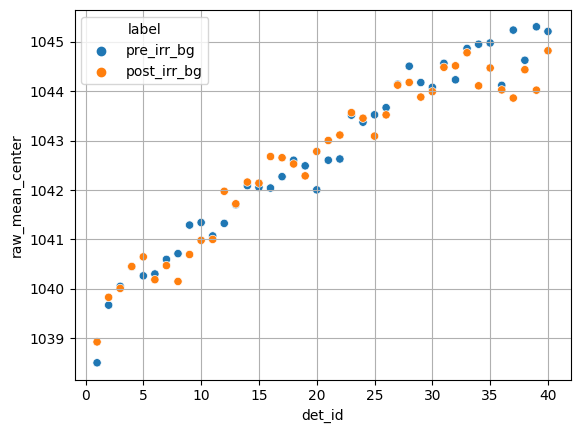

In [10]:
g = sns.scatterplot(data=df[df.label!="Co60"], x="det_id", y="raw_mean_center", hue="label")
g.grid()

# Adding analysis circle

In [11]:
df['analysis_circle'] = df.det_circle.apply(lambda c: Circle(c.x, c.y, 300))
df["raw_mean"] = df.apply(lambda tmpdf: get_mean_std(tmpdf.raw_data, tmpdf.analysis_circle)[0], axis=1)
df["raw_std"] = df.apply(lambda tmpdf: get_mean_std(tmpdf.raw_data, tmpdf.analysis_circle)[1], axis=1)
df.head()

det_id                                           raw_data  \
0       1  [[1020.0, 1062.0, 1058.0, 1071.0, 1066.0, 1073...   
1       2  [[1026.0, 1061.0, 1061.0, 1073.0, 1061.0, 1065...   
2       3  [[1024.0, 1067.0, 1067.0, 1067.0, 1057.0, 1069...   
3       4  [[1025.0, 1065.0, 1062.0, 1064.0, 1068.0, 1074...   
4       5  [[1017.0, 1057.0, 1065.0, 1068.0, 1073.0, 1068...   

                  timestamp                                      det_circle  \
0 2022-11-23 11:08:33+01:00   Circle(x=512.5, y=487.5, r=485.3999938964844)   
1 2022-11-23 11:10:45+01:00   Circle(x=486.5, y=478.5, r=487.1000061035156)   
2 2022-11-23 11:12:14+01:00               Circle(x=487.5, y=466.5, r=489.0)   
3 2022-11-23 11:13:33+01:00               Circle(x=487.5, y=496.5, r=488.0)   
4 2022-11-23 11:14:53+01:00  Circle(x=497.5, y=457.5, r=489.79998779296875)   

   raw_mean_center  raw_std_center       label  \
0      1038.505005       12.582836  pre_irr_bg   
1      1039.671265       12.507147  pre_irr_bg   
2      1040.051636       12.474659  pre_irr_bg   
3      1040.449829       12.496416  pre_irr_bg   
4      1040.264282       12.218828  pre_irr_bg   

                   analysis_circle     raw_mean    raw_std  
0  Circle(x=512.5, y=487.5, r=300)  1036.587402  13.411469  
1  Circle(x=486.5, y=478.5, r=300)  1037.347534  11.007259  
2  Circle(x=487.5, y=466.5, r=300)  1037.697388  10.914078  
3  Circle(x=487.5, y=496.5, r=300)  1038.122925  10.947999  
4  Circle(x=497.5, y=457.5, r=300)  1038.041870  10.686067

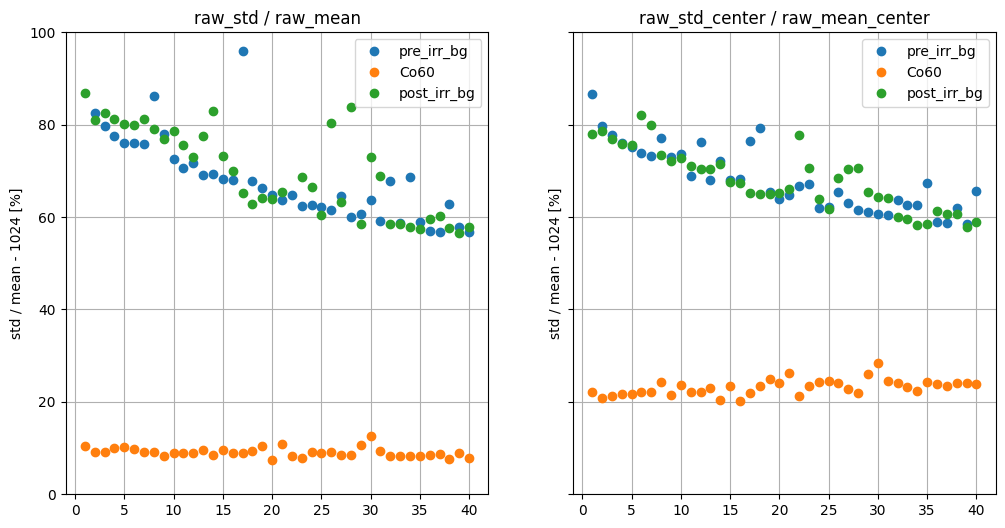

In [12]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
const_bg = 1024
for label in df.label.unique():
    df_tmp = df[df.label==label]
    axes[0].plot(df_tmp.det_id, 100 * (df_tmp.raw_std / (df_tmp.raw_mean-const_bg)) , label=label, marker="o", linestyle="None")
    axes[0].set_title("raw_std / raw_mean")
    axes[1].plot(df_tmp.det_id, 100 * (df_tmp.raw_std_center / (df_tmp.raw_mean_center-const_bg)) , label=label, marker="o", linestyle="None")
    axes[1].set_title("raw_std_center / raw_mean_center")
for ax in axes:
    ax.set_ylabel(f"std / mean - {const_bg} [%]")
    ax.set_ylim(0, 100)
    ax.legend()    
    ax.grid();

In [76]:
from typing import Optional
def plot_2d(data : np.ndarray, circle : Optional[Circle] = None, ax : Optional[plt.Axes] = None, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    im = ax.imshow(np.clip(data, a_min=np.nanpercentile(a=data, q=3), a_max=np.nanpercentile(a=data, q=97)), cmap="terrain", **kwargs)
    cbar = ax.figure.colorbar(im, ax=ax)
    if circle is not None:
        ax.add_artist(plt.Circle((circle.x, circle.y), circle.r, fill=False, color="red"))
        # add a point to the center of the circle
        ax.plot(circle.x, circle.y, "ro")
    ax.plot(data.shape[1] / 2, data.shape[0] / 2, "bo")
    ax.grid()
    return ax

<AxesSubplot: >

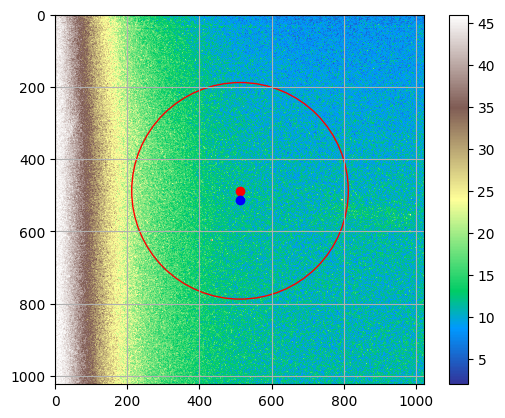

In [77]:
ind = 0
plot_2d(df.iloc[ind].raw_data-1024, df.iloc[ind].analysis_circle)

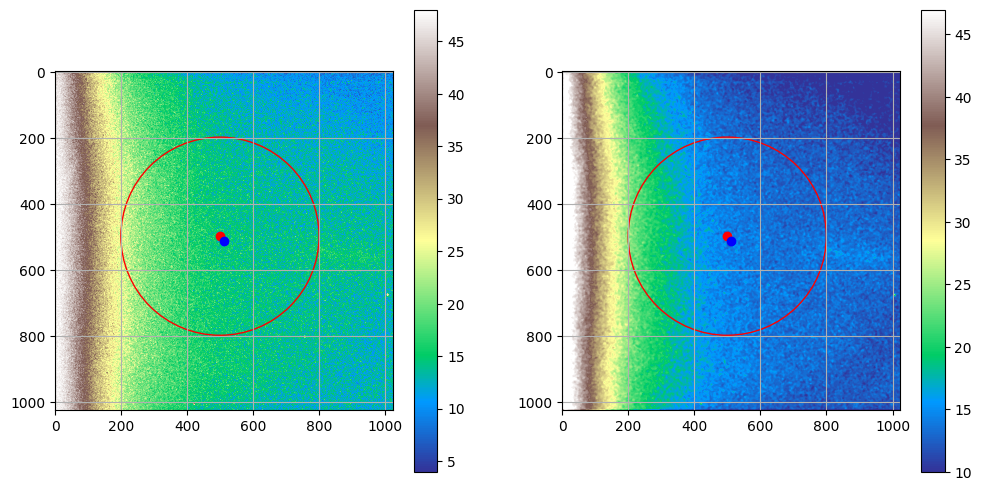

In [78]:
from scipy.signal import medfilt
ind = 15
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
plot_2d(df.iloc[ind].raw_data-1024, df.iloc[ind].analysis_circle, ax=ax[0])
plot_2d(medfilt(df.iloc[ind].raw_data-1024, kernel_size=7), df.iloc[ind].analysis_circle, ax=ax[1]);

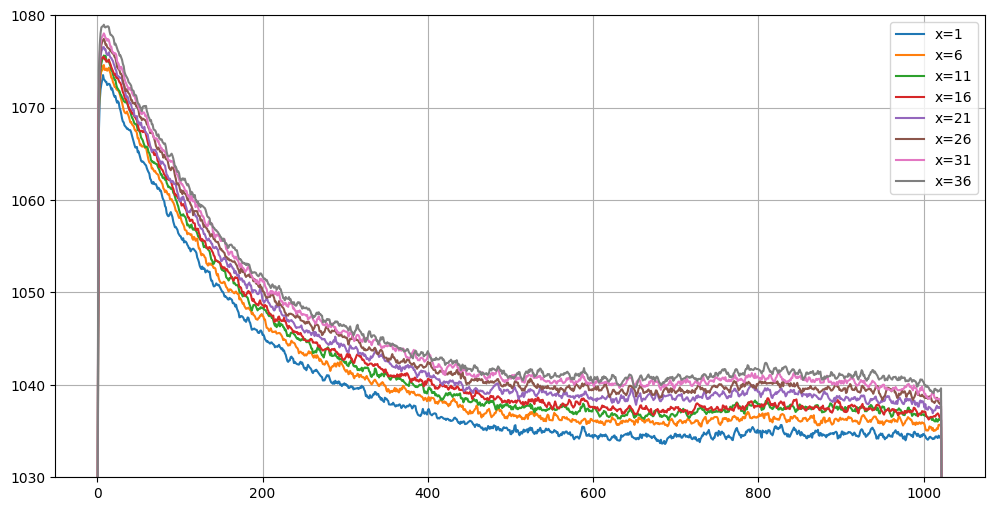

In [79]:
fig, ax = plt.subplots(figsize=(12, 6))
band = 50
df[df.label == 'pre_irr_bg'].iloc[::5].apply(
        lambda x: ax.plot(
            medfilt(x.raw_data[512-band:512+band,:], kernel_size=5).mean(axis=0),
            label=f"x={x.det_id}"
            ), 
        axis=1
        )
ax.legend()
ax.set_ylim(1030, 1080)
ax.grid();

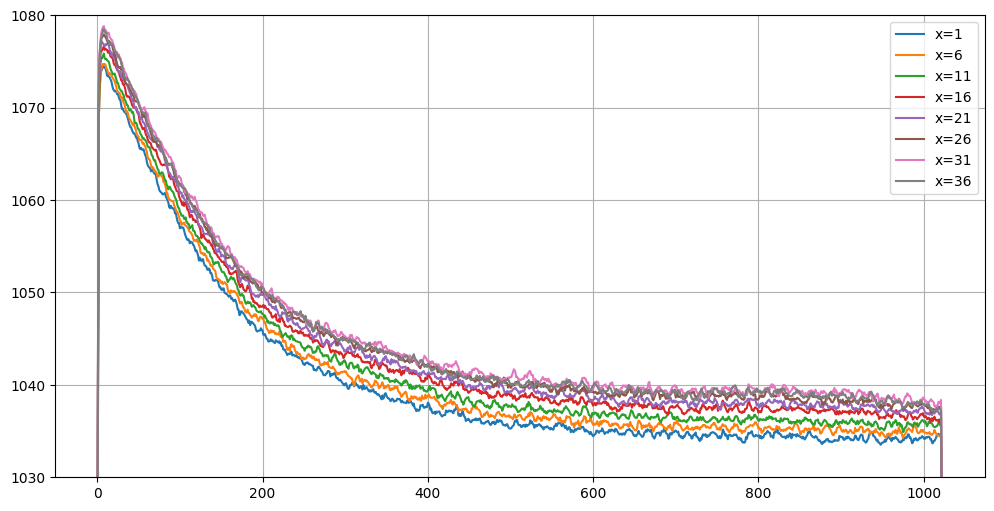

In [80]:
fig, ax = plt.subplots(figsize=(12, 6))
band = 50
df[df.label == 'post_irr_bg'].iloc[::5].apply(
        lambda x: ax.plot(
            medfilt(x.raw_data[512-band:512+band,:], kernel_size=5).mean(axis=0),
            label=f"x={x.det_id}"
            ), 
        axis=1
        )
ax.legend()
ax.set_ylim(1030, 1080)
ax.grid();

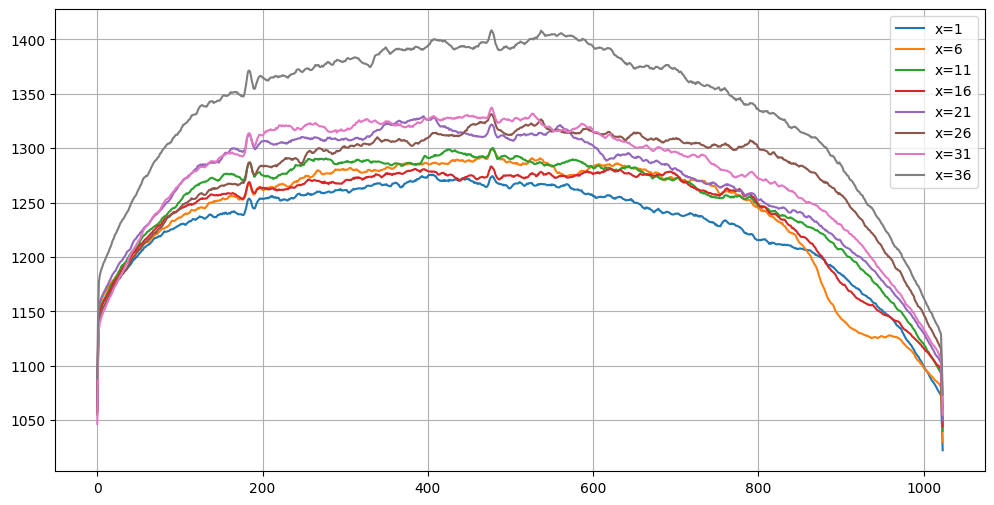

In [81]:
fig, ax = plt.subplots(figsize=(12, 6))
band = 50
df[df.label == 'Co60'].iloc[::5].apply(
        lambda x: ax.plot(
            medfilt(x.raw_data[512-band:512+band,:], kernel_size=5).mean(axis=0),
            label=f"x={x.det_id}"
            ), 
        axis=1
        )
ax.legend()
#ax.set_ylim(1030, 1080)
ax.grid();

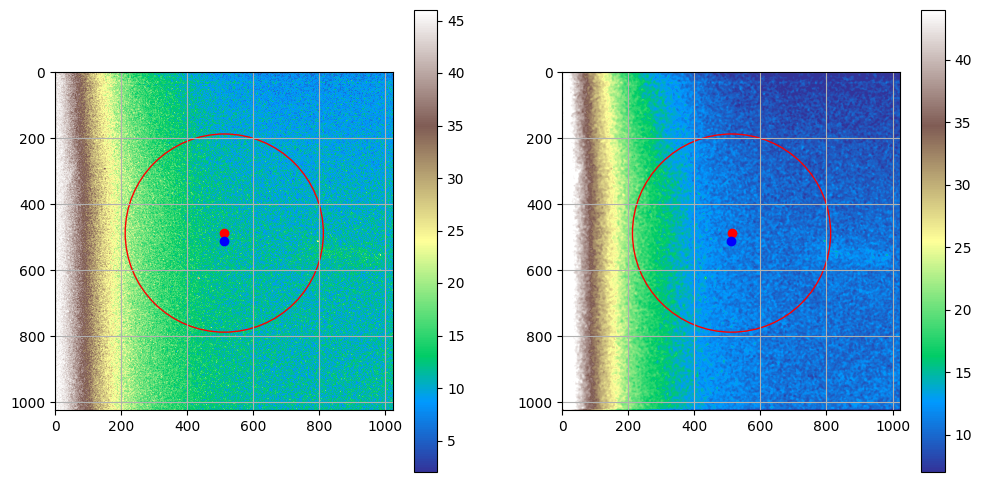

In [82]:
from scipy.signal import medfilt
ind = 0
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
plot_2d(df.iloc[ind].raw_data-1024, df.iloc[ind].analysis_circle, ax=ax[0])
plot_2d(medfilt(df.iloc[ind].raw_data-1024, kernel_size=7), df.iloc[ind].analysis_circle, ax=ax[1]);

# Background subtraction

In [83]:
df_data = df[df.label=="Co60"].copy(deep=True)
df_data.set_index("det_id", inplace=True)
df_data.head()

raw_data  \
det_id                                                      
1       [[1037.0, 1071.0, 1071.0, 1080.0, 1078.0, 1069...   
2       [[1032.0, 1073.0, 1084.0, 1082.0, 1082.0, 1077...   
3       [[1023.0, 1079.0, 1071.0, 1065.0, 1082.0, 1071...   
4       [[1029.0, 1067.0, 1066.0, 1069.0, 1072.0, 1071...   
5       [[1020.0, 1070.0, 1064.0, 1073.0, 1079.0, 1080...   

                       timestamp  \
det_id                             
1      2022-11-23 16:34:28+01:00   
2      2022-11-23 16:33:01+01:00   
3      2022-11-23 16:31:33+01:00   
4      2022-11-23 16:30:18+01:00   
5      2022-11-23 16:29:01+01:00   

                                            det_circle  raw_mean_center  \
det_id                                                                    
1                    Circle(x=497.5, y=481.5, r=484.0)      1214.841187   
2        Circle(x=477.5, y=481.5, r=484.8999938964844)      1223.067017   
3        Circle(x=484.5, y=489.5, r=484.6000061035156)      1220.954590   
4       Circle(x=489.5, y=501.5, r=488.70001220703125)      1209.537476   
5        Circle(x=486.5, y=508.5, r=485.3999938964844)      1229.223877   

        raw_std_center label                  analysis_circle     raw_mean  \
det_id                                                                       
1            42.278210  Co60  Circle(x=497.5, y=481.5, r=300)  1247.885620   
2            41.457825  Co60  Circle(x=477.5, y=481.5, r=300)  1257.969727   
3            41.784103  Co60  Circle(x=484.5, y=489.5, r=300)  1256.023926   
4            40.260750  Co60  Circle(x=489.5, y=501.5, r=300)  1240.028931   
5            44.386940  Co60  Circle(x=486.5, y=508.5, r=300)  1266.734375   

          raw_std  
det_id             
1       23.535187  
2       21.431509  
3       21.040295  
4       21.541489  
5       24.727493

In [84]:
df_bg = df[df.label=="pre_irr_bg"].copy(deep=True)
df_bg.set_index("det_id", inplace=True)
df_bg.head()

raw_data  \
det_id                                                      
1       [[1020.0, 1062.0, 1058.0, 1071.0, 1066.0, 1073...   
2       [[1026.0, 1061.0, 1061.0, 1073.0, 1061.0, 1065...   
3       [[1024.0, 1067.0, 1067.0, 1067.0, 1057.0, 1069...   
4       [[1025.0, 1065.0, 1062.0, 1064.0, 1068.0, 1074...   
5       [[1017.0, 1057.0, 1065.0, 1068.0, 1073.0, 1068...   

                       timestamp  \
det_id                             
1      2022-11-23 11:08:33+01:00   
2      2022-11-23 11:10:45+01:00   
3      2022-11-23 11:12:14+01:00   
4      2022-11-23 11:13:33+01:00   
5      2022-11-23 11:14:53+01:00   

                                            det_circle  raw_mean_center  \
det_id                                                                    
1        Circle(x=512.5, y=487.5, r=485.3999938964844)      1038.505005   
2        Circle(x=486.5, y=478.5, r=487.1000061035156)      1039.671265   
3                    Circle(x=487.5, y=466.5, r=489.0)      1040.051636   
4                    Circle(x=487.5, y=496.5, r=488.0)      1040.449829   
5       Circle(x=497.5, y=457.5, r=489.79998779296875)      1040.264282   

        raw_std_center       label                  analysis_circle  \
det_id                                                                
1            12.582836  pre_irr_bg  Circle(x=512.5, y=487.5, r=300)   
2            12.507147  pre_irr_bg  Circle(x=486.5, y=478.5, r=300)   
3            12.474659  pre_irr_bg  Circle(x=487.5, y=466.5, r=300)   
4            12.496416  pre_irr_bg  Circle(x=487.5, y=496.5, r=300)   
5            12.218828  pre_irr_bg  Circle(x=497.5, y=457.5, r=300)   

           raw_mean    raw_std  
det_id                          
1       1036.587402  13.411469  
2       1037.347534  11.007259  
3       1037.697388  10.914078  
4       1038.122925  10.947999  
5       1038.041870  10.686067

In [85]:
df_data["bg_sub"] = df_data.raw_data - df_bg.raw_data
df_data.head()

raw_data  \
det_id                                                      
1       [[1037.0, 1071.0, 1071.0, 1080.0, 1078.0, 1069...   
2       [[1032.0, 1073.0, 1084.0, 1082.0, 1082.0, 1077...   
3       [[1023.0, 1079.0, 1071.0, 1065.0, 1082.0, 1071...   
4       [[1029.0, 1067.0, 1066.0, 1069.0, 1072.0, 1071...   
5       [[1020.0, 1070.0, 1064.0, 1073.0, 1079.0, 1080...   

                       timestamp  \
det_id                             
1      2022-11-23 16:34:28+01:00   
2      2022-11-23 16:33:01+01:00   
3      2022-11-23 16:31:33+01:00   
4      2022-11-23 16:30:18+01:00   
5      2022-11-23 16:29:01+01:00   

                                            det_circle  raw_mean_center  \
det_id                                                                    
1                    Circle(x=497.5, y=481.5, r=484.0)      1214.841187   
2        Circle(x=477.5, y=481.5, r=484.8999938964844)      1223.067017   
3        Circle(x=484.5, y=489.5, r=484.6000061035156)      1220.954590   
4       Circle(x=489.5, y=501.5, r=488.70001220703125)      1209.537476   
5        Circle(x=486.5, y=508.5, r=485.3999938964844)      1229.223877   

        raw_std_center label                  analysis_circle     raw_mean  \
det_id                                                                       
1            42.278210  Co60  Circle(x=497.5, y=481.5, r=300)  1247.885620   
2            41.457825  Co60  Circle(x=477.5, y=481.5, r=300)  1257.969727   
3            41.784103  Co60  Circle(x=484.5, y=489.5, r=300)  1256.023926   
4            40.260750  Co60  Circle(x=489.5, y=501.5, r=300)  1240.028931   
5            44.386940  Co60  Circle(x=486.5, y=508.5, r=300)  1266.734375   

          raw_std                                             bg_sub  
det_id                                                                
1       23.535187  [[17.0, 9.0, 13.0, 9.0, 12.0, -4.0, 6.0, 9.0, ...  
2       21.431509  [[6.0, 12.0, 23.0, 9.0, 21.0, 12.0, -2.0, 12.0...  
3       21.040295  [[-1.0, 12.0, 4.0, -2.0, 25.0, 2.0, 2.0, 24.0,...  
4       21.541489  [[4.0, 2.0, 4.0, 5.0, 4.0, -3.0, 13.0, 1.0, 6....  
5       24.727493  [[3.0, 13.0, -1.0, 5.0, 6.0, 12.0, 10.0, 5.0, ...

<AxesSubplot: >

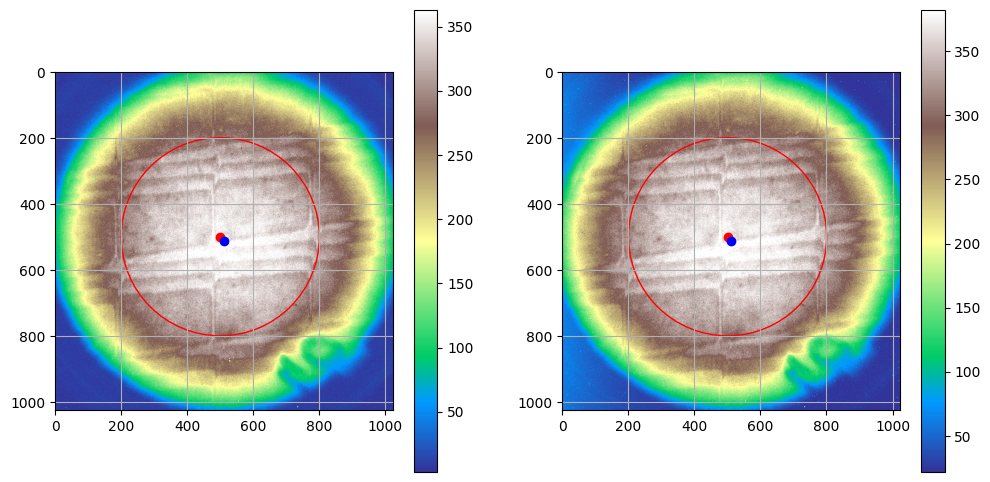

In [89]:
from scipy.signal import medfilt
ind = 39
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
plot_2d(df_data.iloc[ind].bg_sub, df_data.iloc[ind].analysis_circle, ax=ax[0])
plot_2d(df_data.iloc[ind].raw_data-1024, df_data.iloc[ind].analysis_circle, ax=ax[1])

In [94]:
df_data.reset_index().head()

det_id                                           raw_data  \
0       1  [[1037.0, 1071.0, 1071.0, 1080.0, 1078.0, 1069...   
1       2  [[1032.0, 1073.0, 1084.0, 1082.0, 1082.0, 1077...   
2       3  [[1023.0, 1079.0, 1071.0, 1065.0, 1082.0, 1071...   
3       4  [[1029.0, 1067.0, 1066.0, 1069.0, 1072.0, 1071...   
4       5  [[1020.0, 1070.0, 1064.0, 1073.0, 1079.0, 1080...   

                  timestamp                                      det_circle  \
0 2022-11-23 16:34:28+01:00               Circle(x=497.5, y=481.5, r=484.0)   
1 2022-11-23 16:33:01+01:00   Circle(x=477.5, y=481.5, r=484.8999938964844)   
2 2022-11-23 16:31:33+01:00   Circle(x=484.5, y=489.5, r=484.6000061035156)   
3 2022-11-23 16:30:18+01:00  Circle(x=489.5, y=501.5, r=488.70001220703125)   
4 2022-11-23 16:29:01+01:00   Circle(x=486.5, y=508.5, r=485.3999938964844)   

   raw_mean_center  raw_std_center label                  analysis_circle  \
0      1214.841187       42.278210  Co60  Circle(x=497.5, y=481.5, r=300)   
1      1223.067017       41.457825  Co60  Circle(x=477.5, y=481.5, r=300)   
2      1220.954590       41.784103  Co60  Circle(x=484.5, y=489.5, r=300)   
3      1209.537476       40.260750  Co60  Circle(x=489.5, y=501.5, r=300)   
4      1229.223877       44.386940  Co60  Circle(x=486.5, y=508.5, r=300)   

      raw_mean    raw_std                                             bg_sub  
0  1247.885620  23.535187  [[17.0, 9.0, 13.0, 9.0, 12.0, -4.0, 6.0, 9.0, ...  
1  1257.969727  21.431509  [[6.0, 12.0, 23.0, 9.0, 21.0, 12.0, -2.0, 12.0...  
2  1256.023926  21.040295  [[-1.0, 12.0, 4.0, -2.0, 25.0, 2.0, 2.0, 24.0,...  
3  1240.028931  21.541489  [[4.0, 2.0, 4.0, 5.0, 4.0, -3.0, 13.0, 1.0, 6....  
4  1266.734375  24.727493  [[3.0, 13.0, -1.0, 5.0, 6.0, 12.0, 10.0, 5.0, ...

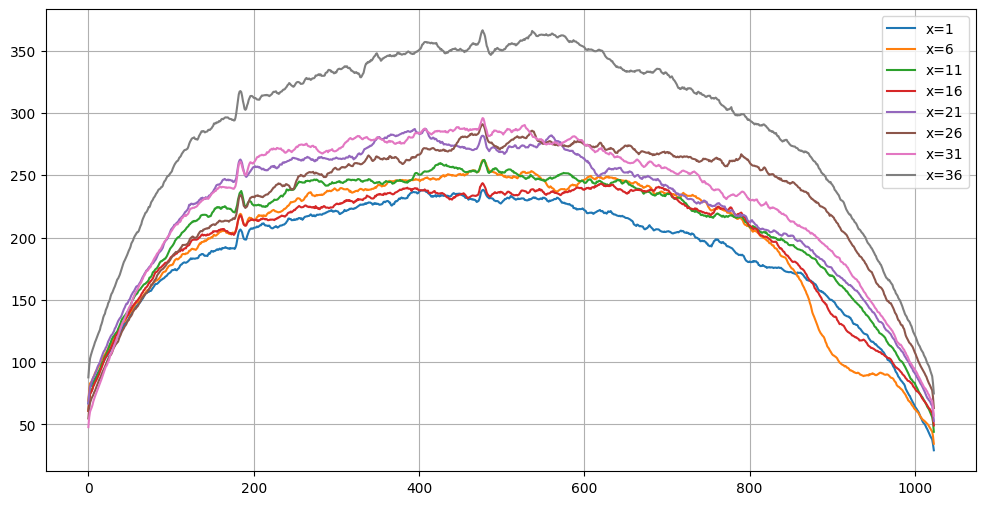

In [96]:
fig, ax = plt.subplots(figsize=(12, 6))
band = 50
df_data.reset_index().iloc[::5].apply(
        lambda x: ax.plot(
            medfilt(x.bg_sub[512-band:512+band,:], kernel_size=5).mean(axis=0),
            label=f"x={x.det_id}"
            ), 
        axis=1
        )
ax.legend()
ax.grid();

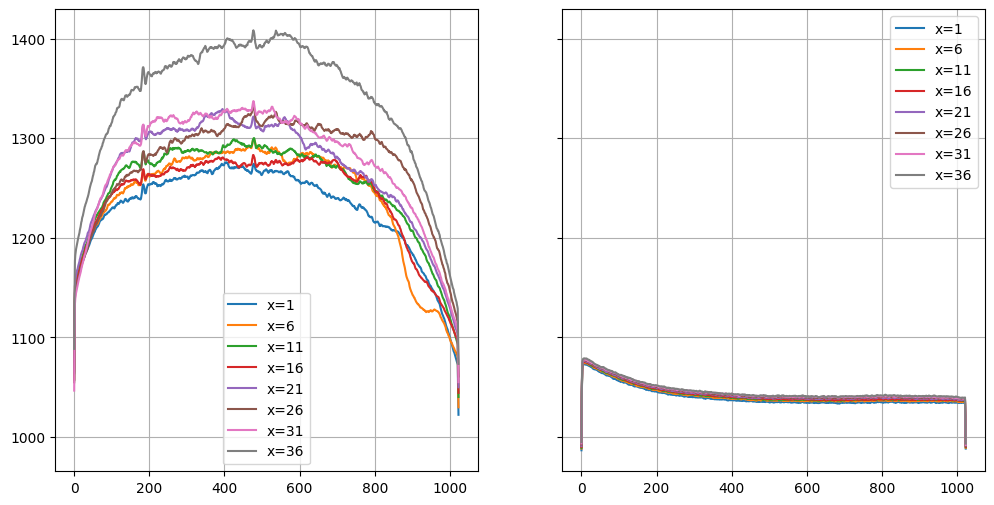

In [98]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
band = 50
df_data.reset_index().iloc[::5].apply(
        lambda x: axes[0].plot(
            medfilt(x.raw_data[512-band:512+band,:], kernel_size=5).mean(axis=0),
            label=f"x={x.det_id}"
            ), 
        axis=1
        )
df_bg.reset_index().iloc[::5].apply(
        lambda x: axes[1].plot(
            medfilt(x.raw_data[512-band:512+band,:], kernel_size=5).mean(axis=0),
            label=f"x={x.det_id}"
            ), 
        axis=1
        )
for ax in axes:
    ax.legend()
    ax.grid();

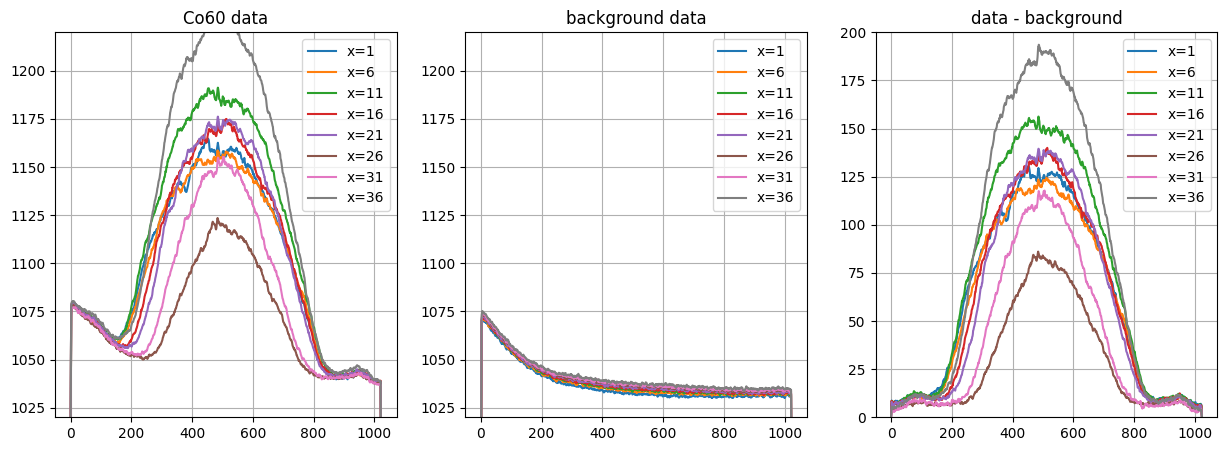

In [104]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
band = 50
df_data.reset_index().iloc[::5].apply(
        lambda x: axes[0].plot(
            medfilt(x.raw_data[:band,:], kernel_size=5).mean(axis=0),
            label=f"x={x.det_id}"
            ), 
        axis=1
        )
df_bg.reset_index().iloc[::5].apply(
        lambda x: axes[1].plot(
            medfilt(x.raw_data[:band,:], kernel_size=5).mean(axis=0),
            label=f"x={x.det_id}"
            ), 
        axis=1
        )
df_data.reset_index().iloc[::5].apply(
        lambda x: axes[2].plot(
            medfilt(x.bg_sub[:band,:], kernel_size=5).mean(axis=0),
            label=f"x={x.det_id}"
            ), 
        axis=1
        )
axes[0].set_title("Co60 data")
axes[0].set_ylim(1020, 1220)
axes[1].set_title("background data")
axes[1].set_ylim(1020, 1220)
axes[2].set_title("data - background")
axes[2].set_ylim(0, 200)
for ax in axes:
    ax.legend()
    ax.grid();

In [106]:
df_data["bg_sub_mean"] = df_data.apply(lambda tmpdf: get_mean_std(tmpdf.bg_sub, tmpdf.analysis_circle)[0], axis=1)
df_data["bg_sub_std"] = df_data.apply(lambda tmpdf: get_mean_std(tmpdf.bg_sub, tmpdf.analysis_circle)[1], axis=1)

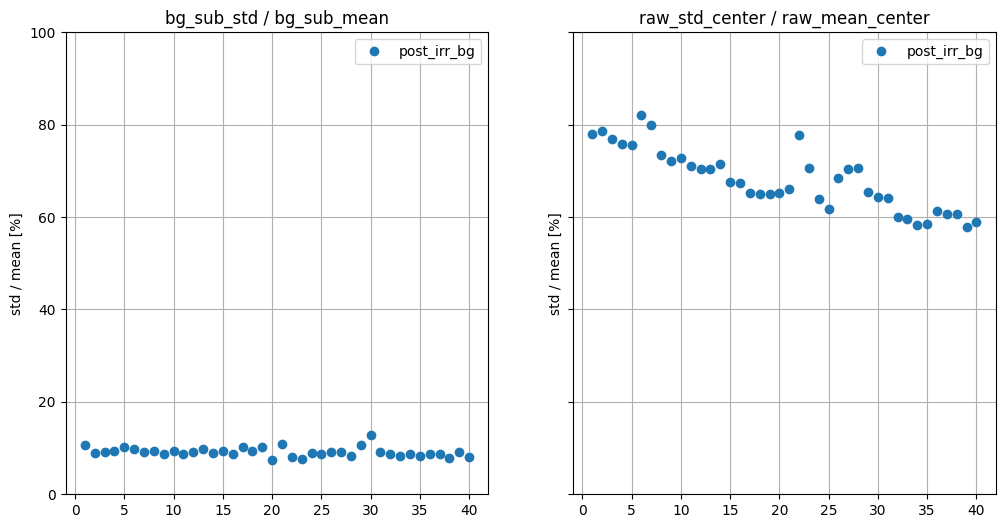

In [112]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
const_bg = 1024
axes[0].plot(df_data.index, 100 * (df_data.bg_sub_std / (df_data.bg_sub_mean)) , label=label, marker="o", linestyle="None")
axes[0].set_title("bg_sub_std / bg_sub_mean")
axes[1].plot(df_data.index, 100 * (df_tmp.raw_std_center / (df_tmp.raw_mean_center-const_bg)) , label=label, marker="o", linestyle="None")
axes[1].set_title("raw_std_center / raw_mean_center")
for ax in axes:
    ax.set_ylabel(f"std / mean [%]")
    ax.set_ylim(0, 100)
    ax.legend()    
    ax.grid();

# FF 

In [19]:
ff_image_path = project_dir / "data" / "interim" / "foils" / "2022_08_22_flat_field" / "FF_2sLED_U340" / "FF_1" / "raw.npy"
ff_data = np.load(ff_image_path)

<AxesSubplot: >

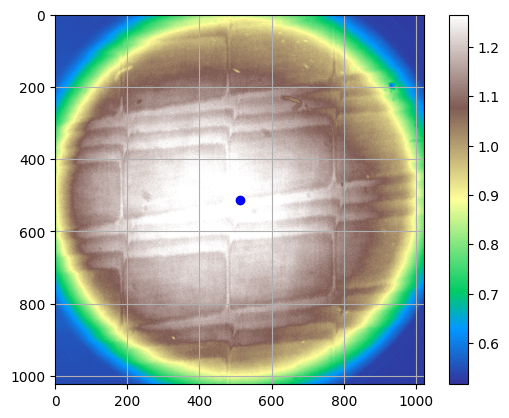

In [22]:
plot_2d(ff_data / np.mean(ff_data))

<AxesSubplot: >

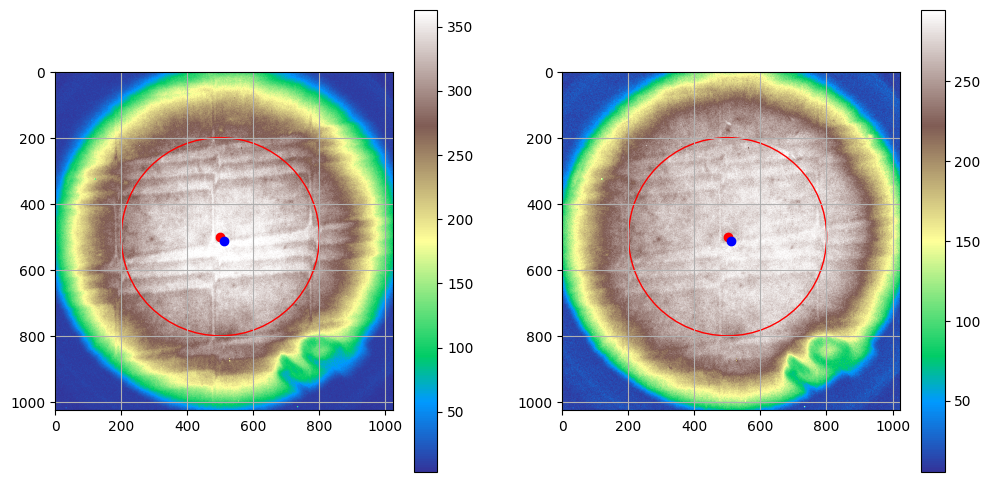

In [116]:
from scipy.signal import medfilt
ind = 39
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
plot_2d(df_data.iloc[ind].bg_sub, df_data.iloc[ind].analysis_circle, ax=ax[0])
plot_2d(df_data.iloc[ind].bg_sub / (ff_data / np.mean(ff_data)) , df_data.iloc[ind].analysis_circle, ax=ax[1])

In [115]:
df_data["ff"] = df_data.bg_sub.apply(lambda x: x / (ff_data / np.mean(ff_data)))

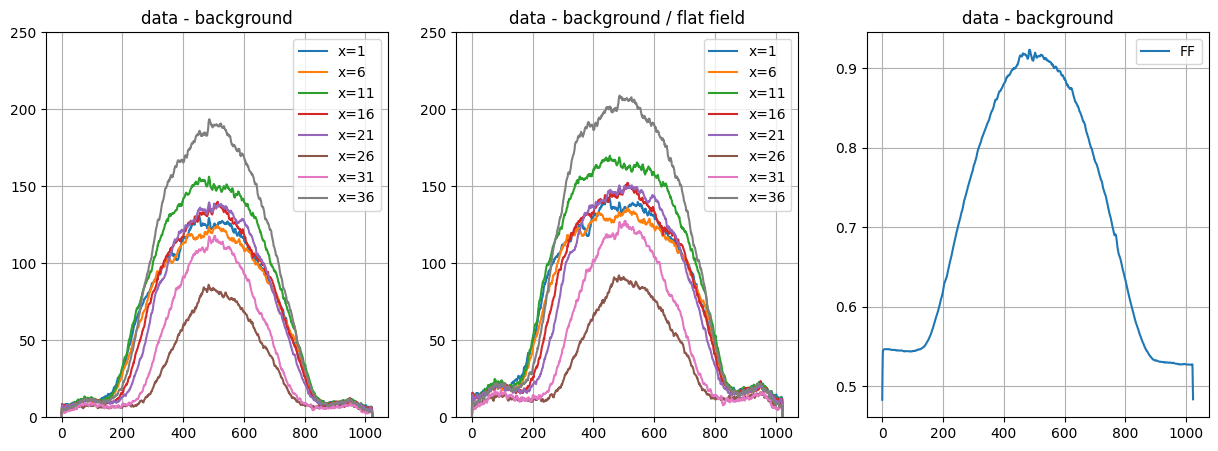

In [122]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
band = 50
df_data.reset_index().iloc[::5].apply(
        lambda x: axes[0].plot(
            medfilt(x.bg_sub[:band,:], kernel_size=5).mean(axis=0),
            label=f"x={x.det_id}"
            ), 
        axis=1
        )
df_data.reset_index().iloc[::5].apply(
        lambda x: axes[1].plot(
            medfilt(x.ff[:band,:], kernel_size=5).mean(axis=0),
            label=f"x={x.det_id}"
            ), 
        axis=1
        )
axes[2].plot(
            medfilt((ff_data / np.mean(ff_data))[:band,:], kernel_size=5).mean(axis=0),
            label=f"FF"
            )
axes[0].set_title("data - background")
axes[0].set_ylim(0, 250)
axes[1].set_title("data - background / flat field")
axes[1].set_ylim(0, 250)
axes[2].set_title("data - background")
#axes[2].set_ylim(0, 200)
for ax in axes:
    ax.legend()
    ax.grid();

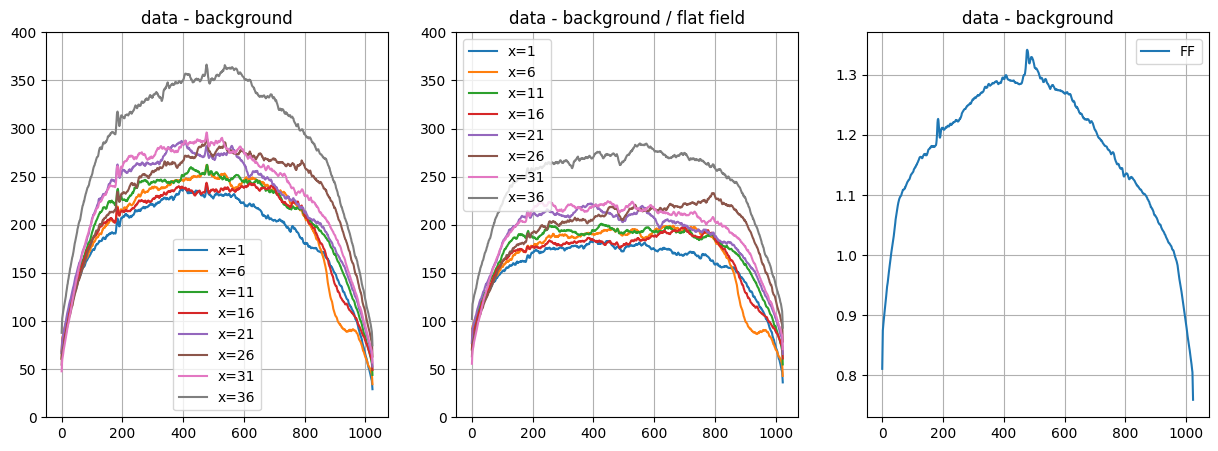

In [125]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
band = 50
df_data.reset_index().iloc[::5].apply(
        lambda x: axes[0].plot(
            medfilt(x.bg_sub[512-band:512+band,:], kernel_size=5).mean(axis=0),
            label=f"x={x.det_id}"
            ), 
        axis=1
        )
df_data.reset_index().iloc[::5].apply(
        lambda x: axes[1].plot(
            medfilt(x.ff[512-band:512+band,:], kernel_size=5).mean(axis=0),
            label=f"x={x.det_id}"
            ), 
        axis=1
        )
axes[2].plot(
            medfilt((ff_data / np.mean(ff_data))[512-band:512+band,:], kernel_size=5).mean(axis=0),
            label=f"FF"
            )
axes[0].set_title("data - background")
axes[0].set_ylim(0, 400)
axes[1].set_title("data - background / flat field")
axes[1].set_ylim(0, 400)
axes[2].set_title("data - background")
for ax in axes:
    ax.legend()
    ax.grid();